In [1]:
plot_output_dir = "C:\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Output Plots"
data_output_dir = "C:\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Output Data"

import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'c:\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Bloomberg\\Metals and Food': ['al.csv', 'al.png', 'copper.csv', 'copper.png', 'food.csv', 'food.png', 'lmex.csv', 'lmex.png', 'metal_food.csv', 'nb.ipynb']


In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.ticker as mtick
import os

In [3]:
local_path = os.getcwd()+"\\"

In [4]:
bl_path = "D:\\Downloads\\Vibhav tracker updates\\Bloomberg 10 Year Govt Bond TR Index.xlsx"

In [5]:
def concatter2(file_name, col1, col2, rename_from, rename_to):
    local_df = pd.read_csv(local_path+file_name, index_col=0, parse_dates=True, dayfirst=True)
    local_df.dropna(inplace=True)
    last_date_in_local = local_df.index[0].to_pydatetime().strftime("%Y-%m-%d")

    bl_df = pd.read_excel(bl_path, sheet_name="Worksheet (2)", usecols=[col1, col2], skiprows=7, index_col=0, parse_dates=True)
    bl_df.dropna(inplace=True)
    bl_df.index.rename("Date", inplace=True)
    bl_df.rename(columns={rename_from: rename_to}, inplace=True)

    final_df = pd.concat([bl_df[last_date_in_local:], local_df])
    return final_df

In [8]:
lmex = concatter2("lmex.csv", 28, 29, "PX_LAST.9", "lmex")

In [9]:
#lmex = lmex[::-1]

In [7]:
#lmex.drop_duplicates()
#dropping duplicates added

In [7]:
lmex.pct_change().dropna().drop_duplicates()*100


,lmex
Date,
2022-10-21,0.673916
2022-10-14,0.776284
2022-10-07,-0.164666
2022-10-07,0.000000
2022-09-30,-1.009197
...,...
2022-03-11,-0.500392
2022-03-18,-3.473447
2022-03-25,1.335563


In [10]:
lmex.drop_duplicates().head(7)


,lmex
Date,
2022-10-28,3531.6
2022-10-21,3555.4
2022-10-14,3583.0
2022-10-07,3577.1
2022-09-30,3541.0
2022-09-23,3535.1
2022-09-16,3689.2


C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_696\508754347.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


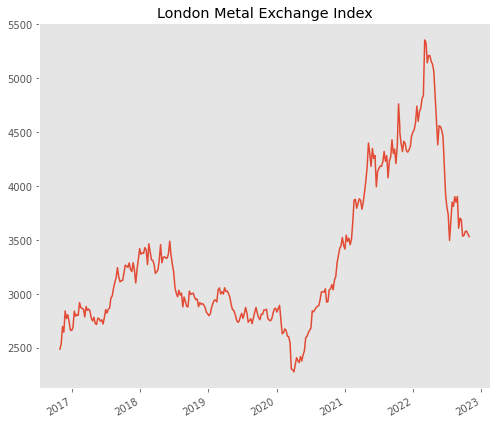

In [11]:
lmex.drop_duplicates()["lmex"].plot(figsize=(7,6), x_compat=True)


plt.title('London Metal Exchange Index')
plt.grid(b=False)
plt.xlabel("")
plt.tight_layout()
plt.savefig(plot_output_dir+'\\lmex.png', dpi=300, bbox_inches='tight')


In [12]:
lmex.to_csv("lmex.csv")
lmex.head()


,lmex
Date,
2022-10-28,3531.6
2022-10-21,3555.4
2022-10-14,3583.0
2022-10-07,3577.1
2022-10-07,3577.1


In [13]:
copper = concatter2("copper.csv", 31, 32, "PX_LAST.10", "Copper")


In [14]:
copper.drop_duplicates().head(7)

,Copper
Date,
2022-10-28,3.4290
2022-10-21,3.4745
2022-10-14,3.4235
2022-10-07,3.3865
2022-09-30,3.4125
2022-09-23,3.3715
2022-09-16,3.5610


In [15]:
copper.iloc[0]

Copper    3.429
Name: 2022-10-28 00:00:00, dtype: float64

In [16]:
copper.head()

,Copper
Date,
2022-10-28,3.4290
2022-10-21,3.4745
2022-10-14,3.4235
2022-10-07,3.3865
2022-10-07,3.3865


In [17]:
copper[::-1].pct_change()

,Copper
Date,
2016-10-28,NaN
2016-11-04,0.032596
2016-11-11,0.107726
2016-11-18,-0.016540
2016-11-25,0.081256
...,...
2022-10-07,-0.007619
2022-10-07,0.000000
2022-10-14,0.010926


In [38]:
 #copper = copper*100

In [18]:
copper[::-1]

,Copper
Date,
2016-10-28,2.1935
2016-11-04,2.2650
2016-11-11,2.5090
2016-11-18,2.4675
2016-11-25,2.6680
...,...
2022-10-07,3.3865
2022-10-07,3.3865
2022-10-14,3.4235


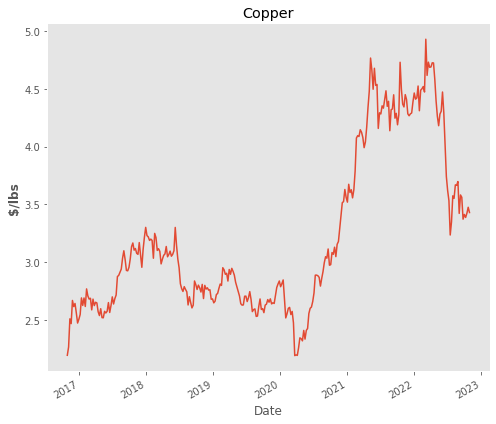

In [19]:
copper["Copper"].plot(figsize=(7,6), x_compat=True)


plt.title('Copper')
plt.grid(visible=False)
plt.ylabel("$/lbs",weight='bold')
plt.tight_layout()
plt.savefig(plot_output_dir+'\\copper.png', dpi=300, bbox_inches='tight')


In [20]:
copper.to_csv("copper.csv")

In [21]:
al = concatter2("al.csv", 35, 36, "PX_LAST.11", "Aluminium")

In [22]:
al[::-1]

,Aluminium
Date,
2016-10-28,1718.75
2016-11-04,1717.25
2016-11-11,1743.50
2016-11-18,1697.75
2016-11-25,1758.75
...,...
2022-10-07,2297.00
2022-10-07,2297.00
2022-10-14,2304.50


In [23]:
al[::-1].pct_change()

,Aluminium
Date,
2016-10-28,NaN
2016-11-04,-0.000873
2016-11-11,0.015286
2016-11-18,-0.026240
2016-11-25,0.035930
...,...
2022-10-07,0.061338
2022-10-07,0.000000
2022-10-14,0.003265


C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_696\2502147388.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


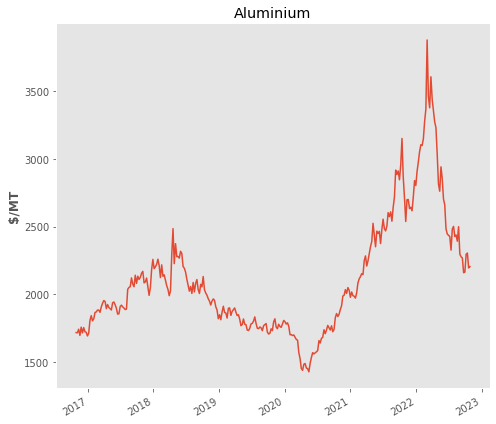

In [24]:
al["Aluminium"].plot(figsize=(7,6), x_compat=True)


plt.title('Aluminium')
plt.grid(b=False)
plt.xlabel("")
plt.ylabel("$/MT", weight="bold")
plt.tight_layout()
plt.savefig(plot_output_dir+'\\al.png', dpi=300, bbox_inches='tight')


In [25]:
al.to_csv("al.csv")

In [26]:
food = concatter2("food.csv", 38, 39, "PX_LAST.12", "food")

In [27]:
food.dropna(inplace=True)

In [28]:
food

,food
Date,
2022-09-30,132.277
2022-08-31,138.070
2022-07-31,141.564
2022-07-31,142.148
2022-07-31,142.148
...,...
2017-02-28,107.023
2017-01-31,106.537
2016-12-31,102.327


In [29]:
food[::-1].pct_change()*100

,food
Date,
2016-10-31,NaN
2016-11-30,0.549467
2016-12-31,1.117633
2017-01-31,4.114261
2017-02-28,0.456180
...,...
2022-07-31,0.000000
2022-07-31,0.000000
2022-07-31,-0.410839


C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_696\668183580.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


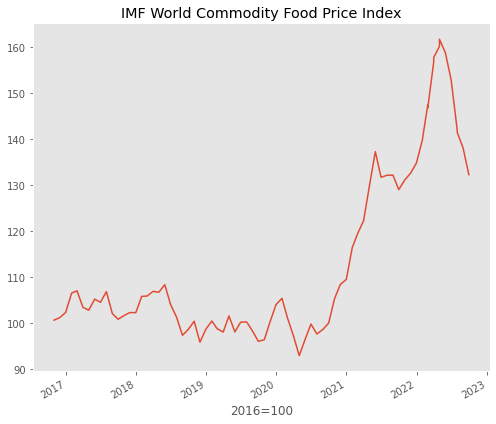

In [30]:
food["food"].plot(figsize=(7,6), x_compat=True)


plt.title('IMF World Commodity Food Price Index')
plt.grid(b=False)
plt.xlabel("2016=100")
plt.tight_layout()
plt.savefig(plot_output_dir+'\\food.png', dpi=200, bbox_inches='tight')


In [30]:
food.to_csv("food.csv")